# SCN2A BBP L5TTPC Hybrid model

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

tick_major = 6
tick_minor = 4
plt.rcParams["xtick.major.size"] = tick_major
plt.rcParams["xtick.minor.size"] = tick_minor
plt.rcParams["ytick.major.size"] = tick_major
plt.rcParams["ytick.minor.size"] = tick_minor

font_small = 12
font_medium = 13
font_large = 14
plt.rc('font', size=font_small)          # controls default text sizes
plt.rc('axes', titlesize=font_medium)    # fontsize of the axes title
plt.rc('axes', labelsize=font_medium)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=font_small)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font_small)    # fontsize of the tick labels
plt.rc('legend', fontsize=font_small)    # legend fontsize
plt.rc('figure', titlesize=font_large)   # fontsize of the figure title

import matplotlib.colors as clr

# Initializing the Model

## Loading the model
This is a L5 pyramidal neuron from the blue brain project

In [2]:
from neuron import h
h.load_file("runModel.hoc")

	1 
	1 
Setting temperature to 34.000000 C
Setting simulation time step to 0.100000 ms
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
**********************
cADpyr232_L5_TTPC1_0fb1ca4724[0].soma[0]
1 
1 
1 
	1 
	1 
	1 


1.0

In [3]:
h.cell.axon[0].eca

140.21871199503352

## Model Controls

In [4]:
def init_stim(sweep_len = 800, stim_start = 100, stim_dur = 500, amp = 0.5, dt = 0.01):
    # updates the stimulation params used by the model
    # time values are in ms
    # amp values are in nA
    
    h("st.del = " + str(stim_start))
    h("st.dur = " + str(stim_dur))
    h("st.amp = " + str(amp))
    h.tstop = sweep_len
    h.dt = dt

def init_settings():
    # create default model parameters to avoid loading the model
    
    h.dend_na12 =0.026145/2
    h.dend_na16 =h.dend_na12
    h.dend_k = 0.004226


    h.soma_na12 = 0.983955/10
    h.soma_na16 = h.soma_na12
    h.soma_K = 0.303472

    h.ais_na16=4
    h.ais_na12=4
    h.ais_ca = 0.000990
    h.ais_KCa = 0.007104

    h.node_na = 2

    h.axon_KP =0.973538
    h.axon_KT = 0.089259
    h.axon_K = 1.021945

    h.cell.axon[0].gCa_LVAstbar_Ca_LVAst = 0.001376286159287454
    
    #h.soma_na12 = h.soma_na12/2
    h.naked_axon_na = h.soma_na16/5
    h.navshift = -10
    h.myelin_na = h.naked_axon_na
    h.myelin_K = 0.303472
    h.myelin_scale = 10
    h.gpas_all = 3e-5
    h.cm_all = 1
    #h.cell.biophys()
    h.working()
        
def run_model(start_Vm = -72):

    h.finitialize(start_Vm)
    timesteps = int(h.tstop/h.dt)
    
    Vm = np.zeros(timesteps)
    I = {}
    I['Na'] = np.zeros(timesteps)
    I['Ca'] = np.zeros(timesteps)
    I['K'] = np.zeros(timesteps)
    t = np.zeros(timesteps)
    
    for i in range(timesteps):
        Vm[i] = h.cell.soma[0].v
        I['Na'][i] = h.cell.soma[0](0.5).ina
        I['Ca'][i] = h.cell.soma[0](0.5).ica
        I['K'][i] = h.cell.soma[0](0.5).ik
        t[i] = i*h.dt / 1000
        h.fadvance()
        
    return Vm, I, t

def plot_Soma_I_Na(start_Vm = -72):
    h.finitialize(start_Vm)
    timesteps = int(h.tstop/h.dt)
    

    current = np.zeros(timesteps)
    time = np.zeros(timesteps)
    for i in range(timesteps):
        curr_I = h.cell.soma[0](0.5).ina
        time[i] = i*h.dt / 1000
        current[i] = curr_I
        h.fadvance()
    return current, time

def add_ttx():
    
    h.ais_na16= 0
    h.ais_na12= 0
    h.dend_na12 = 0
    h.dend_na16 = 0
    h.soma_na12 = 0
    h.soma_na16 = 0
    h.node_na = 0
    h.naked_axon_na = 0
    h.working()
def make_het():
    ais_sec = h.cell.axon[0]
    print(f'ais sgbar_na12mut is{ais_sec.gbar_na12mut}')
    ais_sec.gbar_na12mut = 0
    
    soma_sec = h.cell.soma[0]
    soma_sec.gbar_na12mut = 0
    for section in h.cell.apical:
        print(f'{section} gbar_na12mut - {section.gbar_na12mut}')
        gbar_na12mut = 0
    for section in h.cell.basal:
        print(f'{section} gbar_na12mut - {section.gbar_na12mut}')
        gbar_na12mut = 0
        
def print_namuts():
    ais_sec = h.cell.axon[0]
    print(f'ais sgbar_na12mut is{ais_sec.gbar_na12mut}')
    soma_sec = h.cell.soma[0]
    print(f'soma_sec gbar_na12mut is{h.cell.soma[0].gbar_na12mut}')
    for section in h.cell.apical:
        print(f'{section} gbar_na12mut - {section.gbar_na12mut}')
    for section in h.cell.basal:
        print(f'{section} gbar_na12mut - {section.gbar_na12mut}')
def print_nas():
    ais_sec = h.cell.axon[0]
    print(f'ais sgbar_na12mut is{ais_sec.gbar_na12}')
    soma_sec = h.cell.soma[0]
    print(f'soma_sec gbar_na12mut is{h.cell.soma[0].gbar_na12}')
    for section in h.cell.apical:
        print(f'{section} gbar_na12mut - {section.gbar_na12}')
    for section in h.cell.basal:
        print(f'{section} gbar_na12mut - {section.gbar_na12}')    
    
    
    
    
    

In [5]:
def get_mech_list():
    mech_names = []
    mechlist = h.MechanismType(0)  # object that contains all mechanism names not sure we need this
    for i in range(int(mechlist.count())):
        s = h.ref('')  # string reference to store mechanism name
        mechlist.select(i)
        mechlist.selected(s)
        mech_names.append(s[0])
    return mech_names

def get_topo_mdl2():
    # TODO: Currently prints out DEFAULT values. Check if this is expected behavior.
    available_mechs = set([])
    comp_mechs = []
    mech_params_list = []
    sections = []
    exclude_str = "_ion"
    for s in h.allsec():
        mech_params = {}
        sections.append(h.secname())
        if h.ismembrane("pas"):
            mech_params['g_pas'] = s.g_pas
            mech_params['e_pas'] = s.e_pas
        mech_names = get_mech_list()
        curr_comp_mechs = []
        for mech_name in mech_names:
            if not h.ismembrane(mech_name):
                continue
            ms = h.MechanismStandard(mech_name, -1)  # contains mechanism parameter names
            tmpind = mech_name.find(exclude_str)
            if ms.count() > 0 and tmpind == -1:
                available_mechs.add(mech_name)
                curr_comp_mechs.append(mech_name)

        comp_mechs.append(curr_comp_mechs)
        curr_params = []
        for j in range(int(ms.count())):
            param = h.ref('')  # string reference to store parameter name
            ms.name(param, j)
            h('x = {0}'.format(param[0]))
            mech_params[param[0]] = h.x
            curr_params.append(h.x)
        mech_params_list.append(curr_params)
        # sections[name] = mech_params
    return [sections, comp_mechs, mech_params_list]


In [6]:
init_settings()
[sections,comp_mechs,mech_params_list] = get_topo_mdl2()
print(sections)
print(comp_mechs)
print(mech_params_list)
#h.working()
#print_namuts()
print_nas()

['cADpyr232_L5_TTPC1_0fb1ca4724[0].soma[0]', 'cADpyr232_L5_TTPC1_0fb1ca4724[0].dend[0]', 'cADpyr232_L5_TTPC1_0fb1ca4724[0].dend[1]', 'cADpyr232_L5_TTPC1_0fb1ca4724[0].dend[2]', 'cADpyr232_L5_TTPC1_0fb1ca4724[0].dend[3]', 'cADpyr232_L5_TTPC1_0fb1ca4724[0].dend[4]', 'cADpyr232_L5_TTPC1_0fb1ca4724[0].dend[5]', 'cADpyr232_L5_TTPC1_0fb1ca4724[0].dend[6]', 'cADpyr232_L5_TTPC1_0fb1ca4724[0].dend[7]', 'cADpyr232_L5_TTPC1_0fb1ca4724[0].dend[8]', 'cADpyr232_L5_TTPC1_0fb1ca4724[0].dend[9]', 'cADpyr232_L5_TTPC1_0fb1ca4724[0].dend[10]', 'cADpyr232_L5_TTPC1_0fb1ca4724[0].dend[11]', 'cADpyr232_L5_TTPC1_0fb1ca4724[0].dend[12]', 'cADpyr232_L5_TTPC1_0fb1ca4724[0].dend[13]', 'cADpyr232_L5_TTPC1_0fb1ca4724[0].dend[14]', 'cADpyr232_L5_TTPC1_0fb1ca4724[0].dend[15]', 'cADpyr232_L5_TTPC1_0fb1ca4724[0].dend[16]', 'cADpyr232_L5_TTPC1_0fb1ca4724[0].dend[17]', 'cADpyr232_L5_TTPC1_0fb1ca4724[0].dend[18]', 'cADpyr232_L5_TTPC1_0fb1ca4724[0].dend[19]', 'cADpyr232_L5_TTPC1_0fb1ca4724[0].dend[20]', 'cADpyr232_L5_TTPC1_

## Running the model

In [7]:
init_settings()

sweep_len = 500
stim_dur = 300
amp = 0.5
dt = 0.1
init_stim(sweep_len = sweep_len, stim_dur = stim_dur, amp = amp, dt = dt)

# Run model
Vm, I, t = run_model()
dvdt = np.gradient(Vm)/h.dt

In [8]:
make_het()
Vmhet, I, t = run_model()
dvdthet = np.gradient(Vmhet)/h.dt

ais sgbar_na12mut is0.0
cADpyr232_L5_TTPC1_0fb1ca4724[0].apic[0] gbar_na12mut - 0.00653625
cADpyr232_L5_TTPC1_0fb1ca4724[0].apic[1] gbar_na12mut - 0.00653625
cADpyr232_L5_TTPC1_0fb1ca4724[0].apic[2] gbar_na12mut - 0.00653625
cADpyr232_L5_TTPC1_0fb1ca4724[0].apic[3] gbar_na12mut - 0.00653625
cADpyr232_L5_TTPC1_0fb1ca4724[0].apic[4] gbar_na12mut - 0.00653625
cADpyr232_L5_TTPC1_0fb1ca4724[0].apic[5] gbar_na12mut - 0.00653625
cADpyr232_L5_TTPC1_0fb1ca4724[0].apic[6] gbar_na12mut - 0.00653625
cADpyr232_L5_TTPC1_0fb1ca4724[0].apic[7] gbar_na12mut - 0.00653625
cADpyr232_L5_TTPC1_0fb1ca4724[0].apic[8] gbar_na12mut - 0.00653625
cADpyr232_L5_TTPC1_0fb1ca4724[0].apic[9] gbar_na12mut - 0.00653625
cADpyr232_L5_TTPC1_0fb1ca4724[0].apic[10] gbar_na12mut - 0.00653625
cADpyr232_L5_TTPC1_0fb1ca4724[0].apic[11] gbar_na12mut - 0.00653625
cADpyr232_L5_TTPC1_0fb1ca4724[0].apic[12] gbar_na12mut - 0.00653625
cADpyr232_L5_TTPC1_0fb1ca4724[0].apic[13] gbar_na12mut - 0.00653625
cADpyr232_L5_TTPC1_0fb1ca4724[0].a

### Plot Output

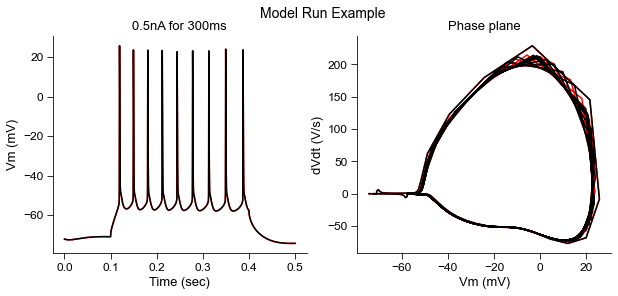

In [9]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharex=False, sharey=False)
fig_title = 'Model Run Example'
fig.suptitle(fig_title) 

title_txt = '{amp}nA for {stim_dur}ms'.format(amp = amp, stim_dur = stim_dur)
ax1.set_title(title_txt) 
ax1.set_xlabel('Time (sec)')
ax1.set_ylabel('Vm (mV)')

ax2.set_title('Phase plane')
ax2.set_xlabel('Vm (mV)')
ax2.set_ylabel('dVdt (V/s)')




ax1.plot(t, Vmhet, color = 'red')
ax2.plot(Vmhet, dvdthet, color = 'red')
ax1.plot(t, Vm, color = 'black')
ax2.plot(Vm, dvdt, color = 'black')
#plt.show()

## Making a Het

In [ ]:
make_het()
Vm, I, t = run_model()
dvdt = np.gradient(Vm)/h.dt
ax1.plot(t, Vm, color = 'red')
ax2.plot(Vm, dvdt, color = 'red')
plt.show()

In [ ]:
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4), sharex=False, sharey=False)
fig_title = 'Ionic Currents at Soma'
fig.suptitle(fig_title) 

ax.set_xlabel("Time (sec)")
ax.set_ylabel("Somatic Current (nA)")

ax.plot(t, I['Na'], label = 'Na', color = 'lightgreen')
ax.plot(t, I['Ca'], label = 'Ca', color = 'red')
ax.plot(t, I['K'], label = 'K', color = 'skyblue')

ax.legend()
# plt.savefig("{}.pdf".format(fig_title), transparent=True)
plt.show()


# AIS NaV Composition on AP Waveform

## Removing All NaV1.2 in baseline model

In [ ]:
def phase_plane_plot(ax1, ax2, label):
    ax1.set_xlabel('Time (sec)')
    ax1.set_ylabel('Vm (mV)')

    ax2.set_xlabel('Vm (mV)')
    ax2.set_ylabel('dVdt (V/s)')
    
    Vm, I, t = run_model()
    dvdt = np.gradient(Vm)/h.dt
    
    start = np.argwhere(dvdt >= 50)[0][0]-10
    stop = start + int(3/h.dt)
    
    Vm=Vm[start:stop]
    dvdt = dvdt[start:stop]
    t = t[start:stop] - t[start]
    
    ax1.plot(t + i*.005, Vm, linewidth = 1, label = label)
    ax2.plot(Vm, dvdt, linewidth = 1)
    
    print(Vm[np.argwhere(dvdt > 15)[0][0]])


sweep_len = 50
stim_dur = 25
stim_start = 25
amp = 0.5
dt = 0.001
init_stim(sweep_len=sweep_len, 
          stim_start=stim_start,
          stim_dur=stim_dur,
          amp=amp,
          dt=dt)

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharex=False, sharey=False)
fig_title = 'Baseline Model'
fig.suptitle(fig_title) 

nav12_percent = np.arange(1,-0.1,-.1)
cmap = clr.LinearSegmentedColormap.from_list('scn2a', 
                                             [(0,    'k'),
                                              (0.5, 'skyblue'),
                                              (1,    'red')], N=256)

ax1.set_prop_cycle('color',cmap(np.linspace(0,1,len(nav12_percent))))
ax2.set_prop_cycle('color',cmap(np.linspace(0,1,len(nav12_percent))))

for i, p in enumerate(nav12_percent):
    init_settings()
    h.ais_na12=h.ais_na12*p
    h.soma_na12 = h.soma_na12*p 
    h.dend_na12 = h.dend_na12*p
    h.working()

    phase_plane_plot(ax1, ax2, label = '{}%'.format(int(p*100)))
    
ax1.legend(frameon=False, title='NaV1.2')
plt.savefig("{}.pdf".format('model_phase_plane'), transparent=True)
plt.show()

In [ ]:
sweep_len = 50
stim_dur = 25
stim_start = 25
amp = 0.5
dt = 0.02
init_stim(sweep_len=sweep_len, 
          stim_start=stim_start,
          stim_dur=stim_dur,
          amp=amp,
          dt=dt)

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharex=False, sharey=False)
fig_title = 'No Rescue in Dendrites'
fig.suptitle(fig_title) 

nav12_percent = np.arange(1,-0.1,-.1)
cmap = clr.LinearSegmentedColormap.from_list('scn2a', 
                                             [(0,    'k'),
                                              (0.5, 'skyblue'),
                                              (1,    'red')], N=256)

ax1.set_prop_cycle('color',cmap(np.linspace(0,1,len(nav12_percent))))
ax2.set_prop_cycle('color',cmap(np.linspace(0,1,len(nav12_percent))))

for i, p in enumerate(nav12_percent):
    init_settings()
    h.ais_na12=h.ais_na12*p
    h.soma_na12 = h.soma_na12*p 
    h.dend_na12 = h.dend_na12*0
    h.working()

    phase_plane_plot(ax1, ax2, label = '{}%'.format(int(p*100)))
    
ax1.legend(frameon=False, title='NaV1.2')
# plt.savefig("{}.pdf".format('model_phase_plane'), transparent=True)
plt.show()


fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharex=False, sharey=False)
fig_title = 'No Rescue in Dendrites or AIS'
fig.suptitle(fig_title) 

nav12_percent = np.arange(1,-0.1,-.1)
cmap = clr.LinearSegmentedColormap.from_list('scn2a', 
                                             [(0,    'k'),
                                              (0.5, 'skyblue'),
                                              (1,    'red')], N=256)

ax1.set_prop_cycle('color',cmap(np.linspace(0,1,len(nav12_percent))))
ax2.set_prop_cycle('color',cmap(np.linspace(0,1,len(nav12_percent))))

for i, p in enumerate(nav12_percent):
    init_settings()
    h.ais_na12=h.ais_na12*p
    h.soma_na12 = h.soma_na12*p 
    h.dend_na12 = h.dend_na12*0
    h.working()

    phase_plane_plot(ax1, ax2, label = '{}%'.format(int(p*100)))
    
ax1.legend(frameon=False, title='NaV1.2')
# plt.savefig("{}.pdf".format('model_phase_plane'), transparent=True)
plt.show()

### Removing AIS NaV1.2 in baseline model

In [ ]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharex=False, sharey=False)
fig_title = 'Baseline Model'
fig.suptitle(fig_title) 

nav12_percent = np.arange(1,-0.1,-.1)
cmap = plt.cm.binary_r

ax1.set_prop_cycle('color',cmap(np.linspace(0,.5,len(nav16_percent))))
ax2.set_prop_cycle('color',cmap(np.linspace(0,.5,len(nav16_percent))))

for i, p in enumerate(nav12_percent):
    init_settings()
    h.ais_na12=h.ais_na12*p
    h.working()

    phase_plane_plot(ax1, ax2, label = '{}%'.format(int(p*100)))
    
ax1.legend(frameon=False, title='NaV1.2')
# plt.savefig("{}.pdf".format(fig_title), transparent=True)
plt.show()

### Removing somatodendritic NaV1.2 in baseline model

In [ ]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharex=False, sharey=False)
fig_title = 'Baseline Model'
fig.suptitle(fig_title) 

nav12_percent = np.arange(1,-0.1,-.1)
cmap = plt.cm.binary_r

ax1.set_prop_cycle('color',cmap(np.linspace(0,.5,len(nav16_percent))))
ax2.set_prop_cycle('color',cmap(np.linspace(0,.5,len(nav16_percent))))

for i, p in enumerate(nav12_percent):
    init_settings()
    h.soma_na12 = h.soma_na12*p 
    h.dend_na12 = h.dend_na12*p
    h.working()

    phase_plane_plot(ax1, ax2, label = '{}%'.format(int(p*100)))
    
ax1.legend(frameon=False, title='NaV1.2')
# plt.savefig("{}.pdf".format(fig_title), transparent=True)
plt.show()

### Removing somatic NaV1.2 in baseline model

In [ ]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharex=False, sharey=False)
fig_title = 'Baseline Model'
fig.suptitle(fig_title) 

nav12_percent = np.arange(1,-0.1,-.1)
cmap = plt.cm.binary_r

ax1.set_prop_cycle('color',cmap(np.linspace(0,.5,len(nav16_percent))))
ax2.set_prop_cycle('color',cmap(np.linspace(0,.5,len(nav16_percent))))

for i, p in enumerate(nav12_percent):
    init_settings()
    h.soma_na12 = h.soma_na12*p 
    h.working()

    phase_plane_plot(ax1, ax2, label = '{}%'.format(int(p*100)))
    
ax1.legend(frameon=False, title='NaV1.2')
# plt.savefig("{}.pdf".format(fig_title), transparent=True)
plt.show()

### Removing dendritic NaV1.2 in baseline model

Only subtle changes to the second part of the repolarization phase, likely due to less recruitment of calcium activated K channels

In [ ]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharex=False, sharey=False)
fig_title = 'Baseline Model'
fig.suptitle(fig_title) 

nav12_percent = np.arange(1,-0.1,-.1)
cmap = plt.cm.binary_r

ax1.set_prop_cycle('color',cmap(np.linspace(0,.5,len(nav16_percent))))
ax2.set_prop_cycle('color',cmap(np.linspace(0,.5,len(nav16_percent))))

for i, p in enumerate(nav12_percent):
    init_settings()
    h.dend_na12=h.dend_na12*p
    h.working()

    phase_plane_plot(ax1, ax2, label = '{}%'.format(int(p*100)))
    
ax1.legend(frameon=False, title='NaV1.2')
# plt.savefig("{}.pdf".format(fig_title), transparent=True)
plt.show()

## Model with modified somatic NaV1.2 and NaV1.6

In [ ]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharex=False, sharey=False)
fig_title = '1.5x somatic NaV1.2, 0.7x somatic '
fig.suptitle(fig_title) 

nav12_percent = np.arange(1,-0.1,-.1)
cmap = plt.cm.binary_r

ax1.set_prop_cycle('color',cmap(np.linspace(0,.5,len(nav16_percent))))
ax2.set_prop_cycle('color',cmap(np.linspace(0,.5,len(nav16_percent))))

for i, p in enumerate(nav12_percent):
    init_settings()
    h.soma_na12 = h.soma_na12*1.5
    h.soma_na16 = h.soma_na16*.7
    
    h.ais_na12=h.ais_na12*p
    h.soma_na12 = h.soma_na12*p 
    h.dend_na12 = h.dend_na12*p
    h.working()

    phase_plane_plot(ax1, ax2, label = '{}%'.format(int(p*100)))
    
ax1.legend(frameon=False, title='NaV1.2')
# plt.savefig("{}.pdf".format(fig_title), transparent=True)
plt.show()

## Compensation by NaV1.6 in the AIS

### Increasing NaV1.6 in the AIS

In [ ]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharex=False, sharey=False)
fig_title = 'Base Model with increasing NaV1.6 '
fig.suptitle(fig_title) 

nav16_percent = np.arange(1, 3, .2)
cmap = plt.cm.binary_r

ax1.set_prop_cycle('color',cmap(np.linspace(0,.5,len(nav16_percent))))
ax2.set_prop_cycle('color',cmap(np.linspace(0,.5,len(nav16_percent))))

for i, p in enumerate(nav16_percent):
    init_settings()    
    h.ais_na16=h.ais_na16*p
    h.working()

    phase_plane_plot(ax1, ax2, label = '{}%'.format(int(p*100)))
    
ax1.legend(frameon=False, title='NaV1.6')
# plt.savefig("{}.pdf".format(fig_title), transparent=True)
plt.show()

In [ ]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharex=False, sharey=False)
fig_title = 'Base Model with increasing NaV1.6 in AIS'
fig.suptitle(fig_title) 

nav16_percent = np.arange(1,2,.1)
cmap = clr.LinearSegmentedColormap.from_list('scn2a', 
                                             [(0,    'k'),
                                              (0.5, 'skyblue'),
                                              (1,    'red')], N=256)

ax1.set_prop_cycle('color',cmap(np.linspace(0,1,len(nav16_percent))))
ax2.set_prop_cycle('color',cmap(np.linspace(0,1,len(nav16_percent))))

for i, p in enumerate(nav16_percent):
    init_settings()    
    h.ais_na16=h.ais_na16*p
    h.ais_na12= 0
    h.dend_na12 = 0
    h.soma_na12 = 0    
    h.working()
    print('NaV16 % ' + str(p))
    phase_plane_plot(ax1, ax2, label = '{}%'.format(int(p*100)))
    
ax1.legend(frameon=False, title='NaV1.6')
plt.savefig("{}.pdf".format(fig_title), transparent=True)
plt.show()


fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharex=False, sharey=False)
fig_title = 'Base Model with increasing NaV1.6 everywhere'
fig.suptitle(fig_title) 

nav16_percent = np.arange(1,2,.1)
cmap = clr.LinearSegmentedColormap.from_list('scn2a', 
                                             [(0,    'k'),
                                              (0.5, 'skyblue'),
                                              (1,    'red')], N=256)

ax1.set_prop_cycle('color',cmap(np.linspace(0,1,len(nav16_percent))))
ax2.set_prop_cycle('color',cmap(np.linspace(0,1,len(nav16_percent))))

for i, p in enumerate(nav16_percent):
    init_settings()    
    h.ais_na16=h.ais_na16*p
    h.soma_na16=h.soma_na16*p
    h.dend_na16=h.dend_na16*p

    h.ais_na12= 0
    h.dend_na12 = 0
    h.soma_na12 = 0    
    h.working()
    print('NaV16 % ' + str(p))
    phase_plane_plot(ax1, ax2, label = '{}%'.format(int(p*100)))
    
ax1.legend(frameon=False, title='NaV1.6')
plt.savefig("{}.pdf".format(fig_title), transparent=True)
plt.show()

### Functions to enable NaV1.2 replacement at the AIS by NaV1.2

In [ ]:
def replace_AIS_nav12_with_nav16(scale _NaV12 = 1):
    NaV12 = []
    NaV16 = []
    for i in range(nseg):
        x = i/ h.cell.axon[0].nseg
        NaV12.append(h.cell.axon[0](x).gbar_na12 + h.cell.axon[0](x).gbar_na12mut)
        NaV16.append(h.cell.axon[0](x).gbar_na16)
    h.ais_na12= 0
    h.dend_na12 = 0
    h.soma_na12 = 0    
    h.working()
    
    NaV12 = NaV12 * scale_NaV12
    for i in range(nseg):
        x = i/ h.cell.axon[0].nseg
        h.cell.axon[0](x).gbar_na16 = NaV12[i] + NaV16[i]
        

def plot_AIS_NaV_distribution(ax):
    NaV12 = []
    NaV16 = []
    distance = []
    nseg = h.cell.axon[0].nseg

    for i in range(nseg):
        x = i/nseg
        distance.append(x)
        NaV12.append(h.cell.axon[0](x).gbar_na12 + h.cell.axon[0](x).gbar_na12mut)
        NaV16.append(h.cell.axon[0](x).gbar_na16)

    NaV12 = np.asarray(NaV12)
    NaV16 = np.asarray(NaV16)   
 
    ax.set_xlabel("Distance")
    ax.set_ylabel("Channel density")
    
    ax.plot(distance, NaV12, label = 'NaV12')
    ax.plot(distance, NaV16, label = 'NaV16')
    ax.plot(distance, NaV12 + NaV16, label = 'NaV12 + NaV16')

    ax.legend(frameon = False)
    
    return ax 

# baseline model
init_settings()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4), sharex=False, sharey=False)
ax.set_title('Baseline model AIS NaV distribution')
ax = plot_AIS_NaV_distribution(ax)
plt.show()

# Hom model 
init_settings()
h.ais_na12= 0
h.dend_na12 = 0
h.soma_na12 = 0    
h.working()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4), sharex=False, sharey=False)
ax.set_title('Hom model AIS NaV distribution')
ax = plot_AIS_NaV_distribution(ax)
plt.show()

# Hom model with NaV1.6 replacement
init_settings()
replace_AIS_nav12_with_nav16()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4), sharex=False, sharey=False)
ax.set_title('Hom model with NaV1.6 replacement AIS NaV distribution')
ax = plot_AIS_NaV_distribution(ax)
plt.show()


### Running the replacement model
This seems to create too large of an AIS hump, and there is no change of threshold 

In [ ]:
sweep_len = 50
stim_dur = 25
stim_start = 25
amp = 0.5
dt = 0.01
init_stim(sweep_len=sweep_len, 
          stim_start=stim_start,
          stim_dur=stim_dur,
          amp=amp,
          dt=dt)

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharex=False, sharey=False)
fig_title = 'Replacement Model'
fig.suptitle(fig_title) 

nav12_percent = np.arange(1,-0.1,-.1)
cmap = plt.cm.binary_r

init_settings()
phase_plane_plot(ax1, ax2, label = 'WT')

init_settings()
h.ais_na12= 0
h.dend_na12 = 0
h.soma_na12 = 0    
h.working()
phase_plane_plot(ax1, ax2, label = 'Hom without replacement')

init_settings()
replace_AIS_nav12_with_nav16()
phase_plane_plot(ax1, ax2, label = 'Hom with replacement')

init_settings()
h.ais_na12= 0
h.dend_na12 = 0
h.soma_na12 = 0    
h.working()
scale_NaV16_proxmimal_AIS()
phase_plane_plot(ax1, ax2, label = 'Hom with even NaV1.6')

ax1.legend(frameon=False, title='NaV1.2')
# plt.savefig("{}.pdf".format(fig_title), transparent=True)
plt.show()

In [ ]:
sweep_len = 50
stim_dur = 35
stim_start = 5
amp = 0.6
dt = 0.1
init_stim(sweep_len=sweep_len, 
          stim_start=stim_start,
          stim_dur=stim_dur,
          amp=amp,
          dt=dt)

Vm, I, t = run_model()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,4), sharex=False, sharey=False)

ax.plot(t,Vm, color='k')
ax.axhline(-53, color='k', linestyle='--')
plt.savefig('AP_example.pdf')

In [ ]:
sweep_len = 50
stim_dur = 10
stim_start = 5
amp = 1
dt = 0.1
init_stim(sweep_len=sweep_len, 
          stim_start=stim_start,
          stim_dur=stim_dur,
          amp=amp,
          dt=dt)

Vm, I, t = run_model()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,4), sharex=False, sharey=False)

ax.plot(t,Vm, color='k')
ax.axis('off')
plt.savefig('single_AP_example.pdf')

In [ ]:
def scale_NaV16_proxmimal_AIS():
    
    for i in range(2, 4):
        x = i/h.cell.axon[0].nseg
        h.cell.axon[0](x).gbar_na16 = 4

init_settings()
h.ais_na12= 0
h.dend_na12 = 0
h.soma_na12 = 0    
h.working()
scale_NaV16_proxmimal_AIS()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4), sharex=False, sharey=False)
ax.set_title('Hom model + Proximal NaV1.6 AIS NaV distribution')
ax = plot_AIS_NaV_distribution(ax)
plt.show()


sweep_len = 50
stim_dur = 25
stim_start = 25
amp = 0.5
dt = 0.01
init_stim(sweep_len=sweep_len, 
          stim_start=stim_start,
          stim_dur=stim_dur,
          amp=amp,
          dt=dt)

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharex=False, sharey=False)
fig_title = 'Replacement Model'
fig.suptitle(fig_title) 

ax1.set_xlabel('Time (sec)')
ax1.set_ylabel('Vm (mV)')

ax2.set_xlabel('Vm (mV)')
ax2.set_ylabel('dVdt (V/s)')


init_settings()

# scale_NaV16_proxmimal_AIS()
Vm, I, t = run_model()
dvdt = np.gradient(Vm)/h.dt

ax1.plot(t + 2*.005, Vm, linewidth = 1, label = 'WT')
ax2.plot(Vm, dvdt, linewidth = 1)

init_settings()
h.ais_na12= 0
h.dend_na12 = 0
h.soma_na12 = 0    
h.working()
scale_NaV16_proxmimal_AIS()
Vm, I, t = run_model()
dvdt = np.gradient(Vm)/h.dt

ax1.plot(t + 2*.005, Vm, linewidth = 1, label = 'Hom with even NaV1.6')
ax2.plot(Vm, dvdt, linewidth = 1)


ax1.legend(frameon=False, title='NaV1.2')
# plt.savefig("{}.pdf".format(fig_title), transparent=True)
plt.show()

# FI Curves

In [ ]:
from scipy.signal import find_peaks

def FI_curve(stims, stim_start = 50, stim_dur = 300, sweep_len = 350, dt = 0.1):
             
    f = []
    i = []
    for amp in stims:
        i.append(amp)
        init_stim(stim_start=stim_start, stim_dur=stim_dur, sweep_len=sweep_len, dt=dt, amp=amp)
        Vm, I, t = run_model()
        peaks = find_peaks(Vm)[0]
        
        num_spikes = 0
        for peak in peaks:
            if Vm[peak] > -40:
                num_spikes = num_spikes + 1
        f.append(num_spikes)
    
    return f, i

def FI_curve_plot(stims, ax, label='', stim_start = 50, stim_dur = 300, sweep_len = 350, dt = 0.1):
    f, i = FI_curve(stims=stims, stim_start=stim_start, stim_dur=stim_dur, sweep_len=sweep_len, dt=dt)
    
    ax.set_ylabel('Spikes per Epoch ({}ms)'.format(stim_dur))
    ax.set_xlabel('Injected Current (nA)')
    ax.plot(i, f, linewidth = 1, label=label) 

    
def FI_curve_spikes(stims, ax, title='', color='k', stim_start = 50, stim_dur = 300, sweep_len = 350, dt = 0.1):
    
    for i, amp in enumerate(stims):
        init_stim(stim_start=stim_start, stim_dur=stim_dur, sweep_len=sweep_len, dt=dt, amp=amp)
        Vm, I, t = run_model()
        
        ax.plot(t, Vm + 110*i, linewidth=1, color=color)
        
    ax.set_title(title)
    ax.set_axis_off()
stims = np.arange(0, .6, .1)
init_settings()

# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4), sharex=False, sharey=False)
# FI_curve_plot(stims, ax)
# plt.show()

# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 16), sharex=False, sharey=False)
# FI_curve_spikes(stims, ax, title='WT')
# plt.show()


## FI Curves with baseline model

In [ ]:
stims = np.arange(0, .6, .1)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4), sharex=False, sharey=False)
ax.set_prop_cycle('color',['k', 'skyblue', 'red'])

init_settings()
FI_curve_plot(stims, ax=ax, label='WT')

init_settings()
h.ais_na12 = h.ais_na12/2
h.soma_na12 = h.soma_na12/2
h.dend_na12 = h.dend_na12/2
h.working()
FI_curve_plot(stims, ax=ax, label='Het')

init_settings()
h.ais_na12 = h.ais_na12*0
h.soma_na12 = h.soma_na12*0
h.dend_na12 = h.dend_na12*0
h.working()
FI_curve_plot(stims, ax=ax, label='Hom')

ax.legend(frameon = False)
plt.show()

In [ ]:
stim_start = 10
stim_dur = 300
sweep_len = 350
dt = 0.1
x_min = .025
x_max = 0.34
fig, [ax1, ax2, ax3] = plt.subplots(nrows=1, ncols=3, figsize=(24, 16), sharex=False, sharey=False)

stims = np.arange(0.1, .31, .05)

init_settings()
FI_curve_spikes(stims, ax1, color='k', title='100% NaV1.2',stim_start=stim_start, stim_dur=stim_dur, sweep_len=sweep_len)
ax1.set_xlim(x_min, x_max)

init_settings()
h.ais_na12 = h.ais_na12/2
h.soma_na12 = h.soma_na12/2
h.dend_na12 = h.dend_na12/2
h.working()
FI_curve_spikes(stims, ax2, color='skyblue', title='50% NaV1.2',stim_start=stim_start, stim_dur=stim_dur, sweep_len=sweep_len)
ax2.set_xlim(x_min, x_max)

init_settings()
h.ais_na12 = h.ais_na12*0
h.soma_na12 = h.soma_na12*0
h.dend_na12 = h.dend_na12*0
h.working()
FI_curve_spikes(stims, ax3, color='red', title='0% NaV1.2',stim_start=stim_start, stim_dur=stim_dur, sweep_len=sweep_len)
ax3.set_xlim(x_min, x_max)


ax1.plot([x_min, x_min], [0, 40], color = 'k')
ax1.plot([x_min, x_min + .05], [0, 0], color = 'k')


plt.savefig("{}.pdf".format('model_FI_curve_spiking'), transparent=True)

plt.show()
print(stims)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4), sharex=False, sharey=False)
fig_title = 'FI curve'
fig.suptitle(fig_title) 

stims = np.arange(0, .4001, .01)
cmap = clr.LinearSegmentedColormap.from_list('scn2a', 
                                             [(0,    'k'),
                                              (0.5, 'skyblue'),
                                              (1,    'red')], N=256)
nav12_percent = np.arange(1,-0.1,-.1)
ax.set_prop_cycle('color',cmap(np.linspace(0,1,len(nav12_percent))))
for p in nav12_percent:
    init_settings()
    h.ais_na12 = h.ais_na12 * p
    h.soma_na12 = h.soma_na12 * p
    h.dend_na12 = h.dend_na12 * p
    h.working()
    FI_curve_plot(stims, ax=ax, label='{}%'.format(int(p * 100)))

ax.legend(frameon=False)
# plt.savefig("{}.pdf".format(fig_title), transparent=True)
plt.show()
#

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4), sharex=False, sharey=False)
fig_title = 'Soma, AIS, and Dendrites'
fig.suptitle(fig_title) 

stims = np.arange(0, .4001, .05)
cmap = clr.LinearSegmentedColormap.from_list('scn2a', 
                                             [(0,    'k'),
                                              (0.5, 'skyblue'),
                                              (1,    'red')], N=256)

nav12_percent = np.arange(1,-0.1,-.1)
ax.set_prop_cycle('color',cmap(np.linspace(0,1,len(nav12_percent))))

for p in nav12_percent:
    init_settings()
    h.ais_na12 = h.ais_na12 * p
    h.soma_na12 = h.soma_na12 * p
    h.dend_na12 = h.dend_na12 * p
    h.working()
    FI_curve_plot(stims, ax=ax, label='{}%'.format(int(p * 100)))

ax.legend(frameon=False)
# plt.savefig("{}.pdf".format(fig_title), transparent=True)
plt.show()


### No rescue in the dendrites

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4), sharex=False, sharey=False)
fig_title = 'Soma and AIS'
fig.suptitle(fig_title) 

stims = np.arange(0, .4001, .05)
cmap = clr.LinearSegmentedColormap.from_list('scn2a', 
                                             [(0,    'k'),
                                              (0.5, 'skyblue'),
                                              (1,    'red')], N=256)

nav12_percent = np.arange(1,-0.1,-.1)
ax.set_prop_cycle('color',cmap(np.linspace(0,1,len(nav12_percent))))

for p in nav12_percent:
    init_settings()
    h.ais_na12 = h.ais_na12 * p
    h.soma_na12 = h.soma_na12 * p
    h.dend_na12 = h.dend_na12 * 0
    h.working()
    FI_curve_plot(stims, ax=ax, label='{}%'.format(int(p * 100)))

ax.legend(frameon=False)
# plt.savefig("{}.pdf".format(fig_title), transparent=True)
plt.show()

### No rescue in the dendrites or AIS

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4), sharex=False, sharey=False)
fig_title = 'Soma only'
fig.suptitle(fig_title) 

stims = np.arange(0, .4001, .05)
cmap = clr.LinearSegmentedColormap.from_list('scn2a', 
                                             [(0,    'k'),
                                              (0.5, 'skyblue'),
                                              (1,    'red')], N=256)

nav12_percent = np.arange(1,-0.1,-.1)
ax.set_prop_cycle('color',cmap(np.linspace(0,1,len(nav12_percent))))

for p in nav12_percent:
    init_settings()
    h.ais_na12 = h.ais_na12 * 0
    h.soma_na12 = h.soma_na12 * p
    h.dend_na12 = h.dend_na12 * 0
    h.working()
    FI_curve_plot(stims, ax=ax, label='{}%'.format(int(p * 100)))

ax.legend(frameon=False)
# plt.savefig("{}.pdf".format(fig_title), transparent=True)
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4), sharex=False, sharey=False)
fig_title = 'FI curve NaV16 AIS comp'
fig.suptitle(fig_title) 

stims = np.arange(0, .4001, .05)
nav16_percent = np.arange(1,2,.1)
cmap = clr.LinearSegmentedColormap.from_list('scn2a', 
                                             [(0,    'k'),
                                              (0.5, 'skyblue'),
                                              (1,    'red')], N=256)
ax.set_prop_cycle('color',cmap(np.linspace(0,1,len(nav16_percent))))
for p in nav16_percent:
    init_settings()
    h.ais_na16 = h.ais_na16 * p
    h.ais_na12 = 0
    h.soma_na12 = 0
    h.dend_na12 = 0
    h.working()
    FI_curve_plot(stims, ax=ax, label='{}%'.format(int(p * 100)))

ax.legend(title='% AIS NaV1.6', frameon=False)
plt.savefig("{}.pdf".format(fig_title), transparent=True)
plt.show()
          
          
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4), sharex=False, sharey=False)
fig_title = 'FI curve NaV16 comp'
fig.suptitle(fig_title) 

stims = np.arange(0, .6, .1)
cmap = clr.LinearSegmentedColormap.from_list('scn2a', 
                                             [(0,    'k'),
                                              (0.5, 'skyblue'),
                                              (1,    'red')], N=256)
nav16_percent = np.arange(1,2,.1)
ax.set_prop_cycle('color',cmap(np.linspace(0,1,len(nav16_percent))))
for p in nav16_percent:
    init_settings()
    h.ais_na16 = h.ais_na16 * p
    h.soma_na16 = h.soma_na16 * p
    h.dend_na16 = h.dend_na16 * p

    h.ais_na12 = 0
    h.soma_na12 = 0
    h.dend_na12 = 0
    h.working()
    FI_curve_plot(stims, ax=ax, label='{}%'.format(int(p * 100)))

ax.legend(title='% NaV1.6', frameon=False)
plt.savefig("{}.pdf".format(fig_title), transparent=True)
plt.show()

In [ ]:
stim_start = 10
stim_dur = 300
sweep_len = 350
dt = 0.1
x_min = .025
x_max = 0.34
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 4), sharex=False, sharey=False)

stims = [.300]

init_settings()
h.ais_na12 = h.ais_na12*0
h.soma_na12 = h.soma_na12*0
h.dend_na12 = h.dend_na12*0
h.working()
FI_curve_spikes(stims, ax1, color='red', title='100% NaV1.2',stim_start=stim_start, stim_dur=stim_dur, sweep_len=sweep_len)
ax1.set_xlim(x_min, x_max)

init_settings()
h.ais_na12 = h.ais_na12*0
h.soma_na12 = h.soma_na12*0
h.dend_na12 = h.dend_na12*0
h.ais_na16 = h.ais_na16*1.2
h.soma_na16 = h.soma_na16*1.2
h.dend_na16 = h.dend_na16*1.2
h.working()
FI_curve_spikes(stims, ax1, color='green', title='50% NaV1.2',stim_start=stim_start, stim_dur=stim_dur, sweep_len=sweep_len)


init_settings()
h.ais_na12 = h.ais_na12*0
h.soma_na12 = h.soma_na12*0
h.dend_na12 = h.dend_na12*0
h.ais_na16 = h.ais_na16*1.5
h.soma_na16 = h.soma_na16*1.5
h.dend_na16 = h.dend_na16*1.5
h.working()
FI_curve_spikes(stims, ax1, color='orange', title='0% NaV1.2',stim_start=stim_start, stim_dur=stim_dur, sweep_len=sweep_len)

init_settings()
h.ais_na12 = h.ais_na12*0
h.soma_na12 = h.soma_na12*0
h.dend_na12 = h.dend_na12*0
h.ais_na16 = h.ais_na16*1.9
h.soma_na16 = h.soma_na16*1.9
h.dend_na16 = h.dend_na16*1.9
h.working()
FI_curve_spikes(stims, ax1, color='purple', title='0% NaV1.2',stim_start=stim_start, stim_dur=stim_dur, sweep_len=sweep_len)



ax1.plot([x_min, x_min], [0, 40], color = 'k')
ax1.plot([x_min, x_min + .05], [0, 0], color = 'k')


plt.savefig("{}.pdf".format('model_FI_curve_spiking_NaV16_comp_everywhere'), transparent=True)
ax1.set_title('model_FI_curve_spiking_NaV16_comp_everywhere')

plt.show()

stim_start = 10
stim_dur = 300
sweep_len = 350
dt = 0.1
x_min = .025
x_max = 0.34
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 4), sharex=False, sharey=False)

stims = [.300]

init_settings()
h.ais_na12 = h.ais_na12*0
h.soma_na12 = h.soma_na12*0
h.dend_na12 = h.dend_na12*0
h.working()
FI_curve_spikes(stims, ax1, color='red', title='100% NaV1.2',stim_start=stim_start, stim_dur=stim_dur, sweep_len=sweep_len)
ax1.set_xlim(x_min, x_max)

init_settings()
h.ais_na12 = h.ais_na12*0
h.soma_na12 = h.soma_na12*0
h.dend_na12 = h.dend_na12*0
h.ais_na16 = h.ais_na16*1.2

h.working()
FI_curve_spikes(stims, ax1, color='green', title='50% NaV1.2',stim_start=stim_start, stim_dur=stim_dur, sweep_len=sweep_len)


init_settings()
h.ais_na12 = h.ais_na12*0
h.soma_na12 = h.soma_na12*0
h.dend_na12 = h.dend_na12*0
h.ais_na16 = h.ais_na16*1.5

h.working()
FI_curve_spikes(stims, ax1, color='orange', title='0% NaV1.2',stim_start=stim_start, stim_dur=stim_dur, sweep_len=sweep_len)

init_settings()
h.ais_na12 = h.ais_na12*0
h.soma_na12 = h.soma_na12*0
h.dend_na12 = h.dend_na12*0
h.ais_na16 = h.ais_na16*1.9

h.working()
FI_curve_spikes(stims, ax1, color='purple', title='0% NaV1.2',stim_start=stim_start, stim_dur=stim_dur, sweep_len=sweep_len)



ax1.plot([x_min, x_min], [0, 40], color = 'k')
ax1.plot([x_min, x_min + .05], [0, 0], color = 'k')


plt.savefig("{}.pdf".format('model_FI_curve_spiking_NaV16_comp_AIS'), transparent=True)
ax1.set_title('model_FI_curve_spiking_NaV16_comp_AIS')

plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4), sharex=False, sharey=False)
fig_title = 'FI curve'
fig.suptitle(fig_title) 

stims = np.arange(0, .6, .1)
cmap = plt.cm.spectral
ax.set_prop_cycle('color',cmap(np.linspace(0,1,len(nav16_percent) + 1)))
nav16_percent = np.arange(1,-0.1,-.1)
for p in nav16_percent:
    init_settings()
    h.ais_na16 = h.ais_na16 * p
    h.soma_na16 = h.soma_na16 * p
    h.dend_na16 = h.dend_na16 * p
    h.working()
    FI_curve_plot(stims, ax=ax, label='{}%'.format(int(p * 100)))

ax.legend(frameon=False)
# plt.savefig("{}.pdf".format(fig_title), transparent=True)
plt.show()


## Interspike AHP

In [ ]:
sweep_len = 100
stim_dur = 50
stim_start = 25
amp = 0.6
dt = 0.1
init_stim(sweep_len=sweep_len, 
          stim_start=stim_start,
          stim_dur=stim_dur,
          amp=amp,
          dt=dt)


x_min = 0.035
x_max = 0.073

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6), sharex=False, sharey=False)
ax.set_title('Model Reducing NaV1.2')
ax.set_ylabel('Vm (mV)')
ax.set_ylabel('Time (sec)')

nav12_percent = np.arange(1,-0.1,-.1)
cmap = clr.LinearSegmentedColormap.from_list('scn2a', 
                                             [(0,    'k'),
                                              (0.5, 'skyblue'),
                                              (1,    'red')], N=256)

ax.set_prop_cycle('color',cmap(np.linspace(0,1,len(nav12_percent))))

for i, p in enumerate(nav12_percent):
    init_settings()
    h.ais_na12=h.ais_na12*p
    h.soma_na12 = h.soma_na12*p 
    h.dend_na12 = h.dend_na12*p
    h.working()
    
    Vm, I, t = run_model()
    t = t[int(x_min/(dt/1000)):int(x_max/(dt/1000))]
    t = t-t[0]
    Vm = Vm[int(x_min/(dt/1000)):int(x_max/(dt/1000))]
    
    ax.plot(t, Vm, linewidth=1, label = '{}'.format(int(p*100)))

ax.plot([0, 0], [-40,-20])
ax.plot([0, 0.005], [-40,-40])
ax.axis('off')
ax.legend(frameon=False, title='NaV1.2 (%)')
ax.set_ylim(-75,40)
plt.savefig("{}.pdf".format('model_WT_reducing_NaV12'), transparent=True)
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6), sharex=False, sharey=False)
ax.set_title('Hom model with increasing KP')
ax.set_ylabel('Vm (mV)')
ax.set_ylabel('Time (sec)')

k_percent = np.arange(1,2.6,.25)
cmap = clr.LinearSegmentedColormap.from_list('scn2a', 
                                             [(0,    'red'),
                                              (1,    'k')], N=256)

ax.set_prop_cycle('color',cmap(np.linspace(0,1,len(k_percent))))

for i, p in enumerate(k_percent):
    init_settings()
    h.ais_na12= 0
    h.soma_na12 = 0
    h.dend_na12 = 0
    h.axon_KP = h.axon_KP * p
    h.working()
    
    Vm, I, t = run_model()
    t = t[int(x_min/(dt/1000)):int(x_max/(dt/1000))]
    t = t-t[0]
    Vm = Vm[int(x_min/(dt/1000)):int(x_max/(dt/1000))]
    ax.plot(t, Vm, linewidth=1, label = '{}'.format(int(p*100)))
    
ax.plot([0, 0], [-40,-20])
ax.plot([0, 0.005], [-40,-40])
ax.axis('off')    
ax.legend(frameon=False, title='KP (%)')
ax.set_ylim(-75,40)
ax.set_ylabel('Vm (mV)')
ax.set_ylabel('Time (sec)')
plt.savefig("{}.pdf".format('model_hom_increasing_KP'), transparent=True)
plt.show()


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6), sharex=False, sharey=False)

ax.set_title('WT model reducing KP')
k_percent = np.arange(1,0.3,-.1)
cmap = clr.LinearSegmentedColormap.from_list('scn2a', 
                                             [(0,    'K'),
                                              (1,    'lightblue')], N=256)

ax.set_prop_cycle('color',cmap(np.linspace(0,1,len(k_percent))))

for i, p in enumerate(k_percent):
    init_settings()
    h.axon_KP = h.axon_KP * p
    h.working()
    
    Vm, I, t = run_model()
    t = t[int(x_min/(dt/1000)):int(x_max/(dt/1000))]
    t = t-t[0]
    Vm = Vm[int(x_min/(dt/1000)):int(x_max/(dt/1000))]
    ax.plot(t, Vm, linewidth=1, label = '{}'.format(int(p*100)))
    
ax.plot([0, 0], [-40,-20])
ax.plot([0, 0.005], [-40,-40])
ax.axis('off')
ax.legend(frameon=False, title='KP (%)')
ax.set_ylim(-75,40)
plt.savefig("{}.pdf".format('model_WT_reducing_KP'), transparent=True)
plt.show()




In [ ]:
stims = np.arange(0.1, .4001, .01)


# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4), sharex=False, sharey=False)
# fig_title = 'FI curve WT to Hom'
# fig.suptitle(fig_title) 

# cmap = clr.LinearSegmentedColormap.from_list('scn2a', 
#                                              [(0,    'k'),
#                                               (0.5, 'skyblue'),
#                                               (1,    'red')], N=256)

# ax.set_prop_cycle('color',cmap(np.linspace(0,1,len(nav12_percent))))
# nav12_percent = np.arange(1,-0.1,-.1)
# for p in nav12_percent:
#     init_settings()
#     h.ais_na12 = h.ais_na12 * p
#     h.soma_na12 = h.soma_na12 * p
#     h.dend_na12 = h.dend_na12 * p
#     h.working()
#     FI_curve_plot(stims, ax=ax, label='{}%'.format(int(p * 100)))

# ax.legend(frameon=False)
# plt.savefig("{}.pdf".format(fig_title), transparent=True)
# plt.show()



# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4), sharex=False, sharey=False)
# fig_title = 'FI curve Hom with increasing KP'
# fig.suptitle(fig_title) 

# k_percent = np.arange(1,2.6,.25)
# cmap = clr.LinearSegmentedColormap.from_list('scn2a', 
#                                              [(0,    'red'),
#                                               (1,    'k')], N=256)

# ax.set_prop_cycle('color',cmap(np.linspace(0,1,len(k_percent))))
# for p in k_percent:
#     init_settings()
#     h.ais_na12 = h.ais_na12 * 0
#     h.soma_na12 = h.soma_na12 * 0
#     h.dend_na12 = h.dend_na12 * 0
#     h.axon_KP = h.axon_KP * p
#     h.working()
    
#     FI_curve_plot(stims, ax=ax, label='{}%'.format(int(p * 100)))

# ax.legend(frameon=False)
# plt.savefig("{}.pdf".format(fig_title), transparent=True)
# plt.show()



fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4), sharex=False, sharey=False)
fig_title = 'FI curve – WT with decrease KP'
fig.suptitle(fig_title) 

k_percent = np.arange(1,0.3,-.1)
cmap = clr.LinearSegmentedColormap.from_list('scn2a', 
                                             [(0,    'K'),
                                              (1,    'lightblue')], N=256)
ax.set_prop_cycle('color',cmap(np.linspace(0,1,len(k_percent))))

for p in k_percent:
    init_settings()
    h.axon_KP = h.axon_KP * p
    h.working()
    
    FI_curve_plot(stims, ax=ax, label='{}%'.format(int(p * 100)))

ax.legend(frameon=False)
plt.savefig("{}.pdf".format(fig_title), transparent=True)
plt.show()

# Currents

In [ ]:
def Na_k_current_plots(label):
    ax2.set_title('I_k')
    ax2.set_xlabel('Time (sec)')
    ax2.set_ylabel('I_k (nA)')
#     ax2.set_ylim(0, 0.8)
    
    ax3.set_title('I_Na')
    ax3.set_xlabel('Time (sec)')
    ax3.set_ylabel('I_Na (nA)')
#     ax3.set_ylim(-2.5, 0)

    Vm, I, t = run_model()
    t= t-t[0]
    dt = t[1]-t[0]
    dvdt = np.gradient(Vm)/h.dt
    
    spike_start = np.argwhere(dvdt >= 50)[0][0] - int(0.0005 / dt)
    spike_end = spike_start + int(0.01 / dt)

    t = t[spike_start:spike_end]
    t = t-t[0]
    Vm = Vm[spike_start:spike_end]
    I_Na = I['Na'][spike_start:spike_end]
    I_K = I['K'][spike_start:spike_end]
    
    ax1.plot(t + i*.015, Vm, linewidth = 1, label = label)    
    ax2.plot(t + i*.015, I_K, linewidth = 1, label = label)
    ax3.plot(t + i*.015, I_Na, linewidth = 1, label = label)

sweep_len = 100
stim_dur = 95
stim_start = 5
amp = 0.35
dt = 0.01
init_stim(sweep_len=sweep_len, 
          stim_start=stim_start,
          stim_dur=stim_dur,
          amp=amp,
          dt=dt)

fig1, [ax1, ax2, ax3] = plt.subplots(nrows=3, ncols=1, figsize=(8,6), sharex=False, sharey=False)
fig_title = 'Baseline Model'
fig1.suptitle(fig_title) 

nav12_percent = np.arange(1,-0.1,-.1)
cmap = clr.LinearSegmentedColormap.from_list('scn2a', 
                                             [(0,    'k'),
                                              (0.5, 'skyblue'),
                                              (1,    'red')], N=256)

ax1.set_prop_cycle('color',cmap(np.linspace(0,1,len(nav12_percent))))
ax2.set_prop_cycle('color',cmap(np.linspace(0,1,len(nav12_percent))))
ax3.set_prop_cycle('color',cmap(np.linspace(0,1,len(nav12_percent))))

ax1.plot([0, 0], [0, 40], 'k')
ax1.plot([0, 0.005], [0, 0], 'k')
ax2.plot([0, 0], [0, .2], 'k')
ax3.plot([0, 0], [0, -0.5], 'k')

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')


for i, p in enumerate(nav12_percent):
    init_settings()
    h.ais_na12=h.ais_na12*p
    h.soma_na12 = h.soma_na12*p 
    h.dend_na12 = h.dend_na12*p
    h.working()

    Na_k_current_plots(label = '{}'.format(int(p*100)))
    
# ax1.legend(frameon=False, title='NaV1.2 (%)')
plt.savefig("{}.pdf".format('model_currents_and_spikes'), transparent=True)
plt.show()

In [ ]:
def Na_k_ratio_plot():

    Vm, I, t = run_model()
    t= t-t[0]
    dt = t[1]-t[0]
    dvdt = np.gradient(Vm)/h.dt
    
    spike_start = np.argwhere(dvdt >= 50)[0][0] - int(0.0005 / dt)
    spike_end = spike_start + int(0.01 / dt)

    t = t[spike_start:spike_end]
    t = t-t[0]
    Vm = Vm[spike_start:spike_end]
    I_Na = I['Na'][spike_start:spike_end]
    I_K = I['K'][spike_start:spike_end]
    
    ratio = np.trapz(np.abs(I_Na),t)/np.trapz(I_K,t)
    AP_height = np.max(Vm)
    ax.scatter(int(p * 100), ratio)


    
sweep_len = 100
stim_dur = 95
stim_start = 5
amp = 0.35
dt = 0.1
init_stim(sweep_len=sweep_len, 
          stim_start=stim_start,
          stim_dur=stim_dur,
          amp=amp,
          dt=dt)

fig1, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3), sharex=False, sharey=False)
fig_title = 'Na/K Ratio'
fig1.suptitle(fig_title) 
ax.set_ylabel('I_Na/I_K ratio')
ax.set_xlabel('Percent NaV1.2')
ax.set_xlim(105, -5)

nav12_percent = np.arange(1,-0.1,-.1)
cmap = clr.LinearSegmentedColormap.from_list('scn2a', 
                                             [(0,    'k'),
                                              (0.5, 'skyblue'),
                                              (1,    'red')], N=256)

ax.set_prop_cycle('color',cmap(np.linspace(0,1,len(nav12_percent))))


for i, p in enumerate(nav12_percent):
    init_settings()
    h.ais_na12=h.ais_na12*p
    h.soma_na12 = h.soma_na12*p 
    h.dend_na12 = h.dend_na12*p
    h.working()

    Na_k_ratio_plot()
    

plt.savefig("{}.pdf".format('NA_K_ratio'), transparent=True)
plt.show()

In [ ]:
def K_AP_height_plot():

    Vm, I, t = run_model()
    t= t-t[0]
    dt = t[1]-t[0]
    dvdt = np.gradient(Vm)/h.dt
    
    spike_start = np.argwhere(dvdt >= 50)[0][0] - int(0.0005 / dt)
    spike_end = spike_start + int(0.01 / dt)

    t = t[spike_start:spike_end]
    t = t-t[0]
    Vm = Vm[spike_start:spike_end]
    I_Na = I['Na'][spike_start:spike_end]
    I_K = I['K'][spike_start:spike_end]

    K_total = np.trapz(I_K,t) *10000
    print(K_total)
    AP_height = np.max(Vm)
    ax.scatter(AP_height, K_total)
    
sweep_len = 100
stim_dur = 95
stim_start = 5
amp = 0.35
dt = 0.1
init_stim(sweep_len=sweep_len, 
          stim_start=stim_start,
          stim_dur=stim_dur,
          amp=amp,
          dt=dt)

fig1, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3), sharex=False, sharey=False)
fig_title = 'Na/K Ratio'
fig1.suptitle(fig_title) 
ax.set_ylabel('I_K')
ax.set_xlabel('AP_height')


nav12_percent = np.arange(1,-0.1,-.1)
cmap = clr.LinearSegmentedColormap.from_list('scn2a', 
                                             [(0,    'k'),
                                              (0.5, 'skyblue'),
                                              (1,    'red')], N=256)

ax.set_prop_cycle('color',cmap(np.linspace(0,1,len(nav12_percent))))


for i, p in enumerate(nav12_percent):
    init_settings()
    h.ais_na12=h.ais_na12*p
    h.soma_na12 = h.soma_na12*p 
    h.dend_na12 = h.dend_na12*p
    h.working()

    K_AP_height_plot()
    

plt.savefig("{}.pdf".format('K_AP_height_plot'), transparent=True)
plt.show()

# Old stuff

In [ ]:
init_stim(dur = 300, len = 400, amp = .2, dt = .02, delay = 50)


fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Time (sec)')
ax1.set_ylabel('Vm (mV)')
ax2 = fig.add_subplot(122)
ax2.set_xlabel('Vm (mV)')
ax2.set_ylabel('dVdt (V/s)')

init_settings()
h.soma_na12 = h.soma_na12*1.3
h.soma_na16 = h.soma_na16*.85
h.working()

volts, time = run_model()
dvdt = np.gradient(volts)/h.dt
ax1.plot(time,volts, color = 'black')
ax2.plot(volts,dvdt, color = 'black')

init_settings()
h.ais_na12 = h.ais_na12/2
h.soma_na12 = h.soma_na12/2
# h.ais_na16 = h.ais_na16 * 1.3
h.working()

volts, time = run_model()
dvdt = np.gradient(volts)/h.dt
ax1.plot(time,volts, color = 'skyblue')
ax2.plot(volts,dvdt, color = 'skyblue')

init_settings()
h.ais_na12 = 0
h.soma_na12 = 0
h.soma_na12 = 0
# h.ais_na16 = h.ais_na16 * 1.5
h.working()

volts, time = run_model()
volts, time = run_model()
dvdt = np.gradient(volts)/h.dt
ax1.plot(time,volts, color = 'red')
ax2.plot(volts,dvdt, color = 'red')

# ax2.set_xlim(-55, -45)






In [ ]:

stims = np.arange(0, 1, .1)

fig = plt.figure()
ax = plt.gca()
ax.set_ylabel('Spikes per epoch (300 ms)')
ax.set_xlabel('Current injection (nA)')

init_settings()
h.soma_na12 = h.soma_na12*1.3
h.soma_na16 = h.soma_na16*.85

h.working()
f, i = FI_curve(stims)
ax.plot(i, f, color = 'k', label = 'WT')

h.ais_na12 = h.ais_na12/2
h.soma_na12 = h.soma_na12/2
h.working()
f, i = FI_curve(stims)
ax.plot(i, f, color = 'skyblue', label = '50% NaV1.2')

h.ais_na12 = 0
h.soma_na12 = 0
h.soma_na12 = 0
# h.ais_na16 = h.ais_na16 * 1.5
h.working()
f, i = FI_curve(stims)
ax.plot(i, f, color = 'red', label = 'No NaV1.2')


h.ais_na12 = 0
h.soma_na12 = 0
h.soma_na12 = 0
h.ais_na16 = h.ais_na16 * 1.5
h.working()
f, i = FI_curve(stims)
ax.plot(i, f, color = 'firebrick', label = 'No NaV1.2 + 1.5x NaV1.6')

ax.legend(frameon=False)

In [ ]:
fig = plt.figure()
ax = plt.gca()

init_settings()
h.soma_na12 = h.soma_na12*1.3
h.soma_na16 = h.soma_na16*.85
h.ais_na12 = 0
h.soma_na12 = 0
h.soma_na12 = 0
h.ais_na16 = h.ais_na16 * 1.5

stims = np.arange(0, 1, .2)
for i, stim in enumerate(stims):
    init_stim(dur = 300, len = 450, amp = stim, dt = 0.1)
    volts, time = run_model()
    
    ax.plot(time, volts + i*80, color = 'k')
    





In [ ]:
fig = plt.figure()
ax = plt.gca()
ax.set_ylabel('Spikes per epoch (300 ms)')
ax.set_xlabel('Current injection (nA)')

ax.set_title('Hom AIS NaV1.6 compensation comparison')
init_settings()
h.soma_na12 = h.soma_na12*1.3
h.soma_na16 = h.soma_na16*.85

h.ais_na12 = 0
h.soma_na12 = 0
h.soma_na12 = 0
# h.ais_na16 = h.ais_na16 * 1.5
h.working()
f, i = FI_curve(stims)
ax.plot(i, f, color = 'k', label = 'Hom')

h.ais_na16 = h.ais_na16 * 1.5
h.working()
f, i = FI_curve(stims)
ax.plot(i, f, color = 'red', label = 'Hom + 1.5x AIS NaV1.6')

ax.legend(frameon=False)

# Misc

In [ ]:

cmap = clr.LinearSegmentedColormap.from_list('scn2a', 
                                             [(0,    'k'),
                                              (0.5, 'skyblue'),
                                              (1,    'red')], N=256)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(1,4), sharex=False, sharey=False)

ax.axis('off')
ax.imshow(np.transpose(gradient), aspect='auto', cmap=cmap)
plt.savefig('WT_het_hom_gradient.pdf')



cmap = clr.LinearSegmentedColormap.from_list('scn2a', 
                                             [(0,    'K'),
                                              (1,    'lightblue')], N=256)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(1,4), sharex=False, sharey=False)

ax.axis('off')
ax.imshow(np.transpose(gradient), aspect='auto', cmap=cmap)
plt.savefig('WT_KP_gradient.pdf')

cmap = clr.LinearSegmentedColormap.from_list('scn2a', 
                                             [(0,    'red'),
                                              (1,    'k')], N=256)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(1,4), sharex=False, sharey=False)

ax.axis('off')
ax.imshow(np.transpose(gradient), aspect='auto', cmap=cmap)
plt.savefig('Hom_KP_gradient.pdf')

In [ ]:
gradient

# 